![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import nltk

In [ ]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [ ]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

,count
airline_sentiment,
negative,9178
neutral,3099
positive,2363


In [ ]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

,count
airline,
United,3822
US Airways,2913
American,2759
Southwest,2420
Delta,2222
Virgin America,504


<Axes: title={'center': 'Sentiminetos por aerolínea'}, xlabel='airline'>

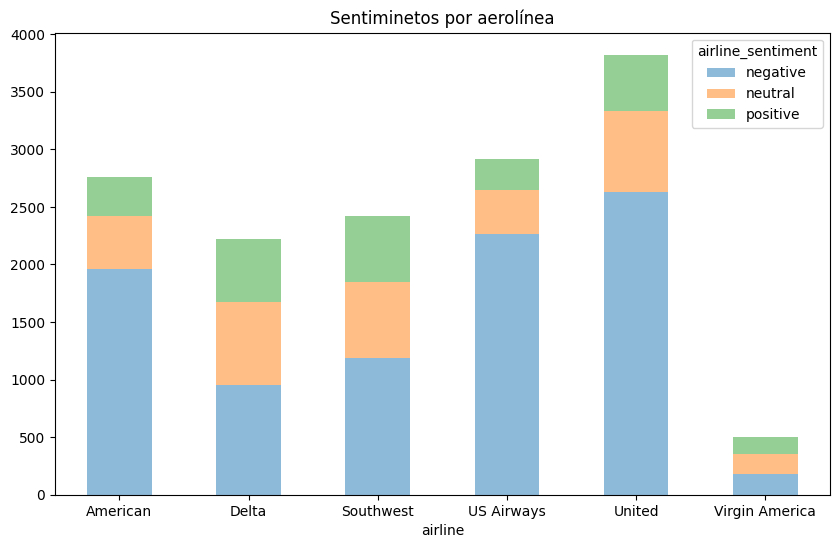

In [ ]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [ ]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [ ]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 1
from sklearn.metrics import accuracy_score

# 1. Creamos el vectorizador que convierte el texto en una matriz de conteo de palabras
vectorizador = CountVectorizer()

# 2. Ajustamos el vectorizador con los datos de entrenamiento y los transformamos
X_train_vectorizado = vectorizador.fit_transform(X_train)

# 3. Transformamos los datos de prueba usando el mismo vectorizador (sin volver a ajustarlo)
X_test_vectorizado = vectorizador.transform(X_test)

# 4. Creamos el modelo de Random Forest
modelo = RandomForestClassifier(random_state=42)

# 5. Entrenamos el modelo con los datos de entrenamiento vectorizados
modelo.fit(X_train_vectorizado, y_train)

# 6. Hacemos predicciones con el modelo usando los datos de prueba
y_pred_CountVect = modelo.predict(X_test_vectorizado)

# 7. Calculamos el accuracy del modelo (qué tan bien predice el sentimiento)
accuracy_CountVect = accuracy_score(y_test, y_pred_CountVect)

# 8. Mostramos el resultado
print(f'Accuracy del modelo en el set de test: {accuracy_CountVect:.4f}')


Accuracy del modelo en el set de test: 0.7711


**Analisis**

* Este valor indica que el modelo clasifica correctamente el 77% de los tweets en su sentimiento real, lo cual es un desempeño razonablemente bueno, especialmente para un primer intento con un modelo básico de texto.

* El modelo ha logrado capturar patrones en el lenguaje que diferencian bien entre sentimientos.

* A pesar de que no se usaron técnicas avanzadas como lematización o embeddings, el CountVectorizer combinado con un Random Forest ha dado una base sólida.

* Con el accuracy que logro el modelo, implica que es capaz de predecir correctamente el sentimiento (positivo, neutral o negativo) en 3 de cada 4 tweets relacionados con aerolíneas. Esto es especialmente valioso en un contexto donde las redes sociales actúan como un canal de comunicación directo entre los clientes y las aerolíneas.

* Además, este resultado muestra que incluso con un enfoque simple —sin preprocesamiento profundo ni modelos complejos de lenguaje— ya se pueden identificar patrones significativos en el lenguaje de los usuarios. La combinación de CountVectorizer (que representa el texto mediante la frecuencia de palabras) y un modelo como RandomForest (que maneja bien datos ruidosos) ofrece una base robusta para tareas de análisis de sentimiento.

### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
#Celda 2

# Vectorizador eliminando stopwords en inglés
vect_no_stopw = CountVectorizer(stop_words='english')

# Ajuste del vectorizador sobre los datos de entrenamiento y transformación
X_train_vect = vect_no_stopw.fit_transform(X_train)
X_test_vect = vect_no_stopw.transform(X_test)

# Modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_vect, y_train)

# Predicción sobre el set de prueba
y_pred_stopwords = rf_model.predict(X_test_vect)

# Cálculo del accuracy
accuracy_stopwords = accuracy_score(y_test, y_pred_stopwords)
print(f"Accuracy del modelo sin stopwords: {accuracy_stopwords:.4f}")

Accuracy del modelo sin stopwords: 0.7618


**Analisis**

En este punto, se implementó un modelo de Random Forest utilizando la representación de texto generada por CountVectorizer, excluyendo las stopwords en inglés. El objetivo fue evaluar si eliminar estas palabras comunes —que suelen aportar poco contenido semántico— mejora el rendimiento del modelo de clasificación de sentimientos en tweets.

Resultados obtenidos:
Accuracy del modelo sin stopwords: 0.7618

Este valor indica que aproximadamente el 76.18% de las predicciones realizadas por el modelo coinciden con las etiquetas reales del conjunto de prueba.

La eliminación de stopwords es un paso relevante en el procesamiento de texto, especialmente cuando se utiliza un enfoque de bolsa de palabras (Bag of Words). En este caso, permitió alcanzar una precisión competitiva con un modelo sencillo como Random Forest, lo que demuestra su utilidad como técnica base en problemas de análisis de sentimientos.

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 3
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

# Obtención de los lemas de cada palabra asumiendo que son verbos.
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]

#Matriz
vect_lemas = CountVectorizer(analyzer=split_into_lemmas)

#Creamos los df tratados
X_train_lemma = vect_lemas.fit_transform(X_train)
X_test_lemma = vect_lemas.transform(X_test)

#Entrenamos el modelo
clf_lemma = RandomForestClassifier(random_state=2052025)
clf_lemma.fit(X_train_lemma, y_train)

#Generamos las predicciones
y_pred_lemma = clf_lemma.predict(X_test_lemma)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#Calculamos el accuracy
accuracy_lemma = accuracy_score(y_test, y_pred_lemma)
print(f"\n Accuracy del modelo con lematización: {accuracy_lemma}")


 Accuracy del modelo con lematización: 0.7605546357615894


In [ ]:
 print(list(vect_lemas.vocabulary_.keys())[:20])

['@jetblue', 'of', 'course', 'i', 'am!!✈️', '@americanair', 'complt', 'incompetence', 'on', 'flt', '295.lav', 'delay', 'from', 'a', 'pln', 'that', 'lnded', 'last', 'nite,', 'no']


El desempeño del modelo que utiliza lematización es bueno, aunque no significativamente superior a los modelos más simples. Presenta un accuracy de 76%, es decir, que al clasificar los sentimientos de los tweets el modelo acierta en 76 de cada 100 casos.

Si bien la lematización ayuda a reducir el ruido presente en el conjunto de datos, al revisar unos pocos casos del dataset transformado se encuentra que existen varias palabras que podrían eliminarse a través de la identificación de stopwords, lo que podría estar afectando el desempeño del modelo. Asimismo, este se podría beneficiar de una limpieza de datos más exhaustiva.

### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 4
nltk.download('wordnet')
nltk.download('stopwords')

# Inicializamos lematizador y stopwords en inglés
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Eliminación de stopwords y obtención de los lemas de cada palabra asumiendo que son verbos
def custom_preprocessor(text):
    text = text.lower()
    words = text.split()
    lemmas = [lemmatizer.lemmatize(word, pos='v') for word in words]
    return [lemma for lemma in lemmas if lemma not in stop_words]

#Matriz
vectorizer = CountVectorizer(analyzer=custom_preprocessor)

#Creamos los df tratados con vectores
X_train_cuatro_m = vectorizer.fit_transform(X_train)
X_test_cuatro_m = vectorizer.transform(X_test)

# Entrenamos el modelo Random Forest
model = RandomForestClassifier(random_state=3052025)
model.fit(X_train_cuatro_m, y_train)

# Predicciones
y_pred_cuatro_m = model.predict(X_test_cuatro_m)

# Evaluamos con accuracy
accuracy_cuatro_m = accuracy_score(y_test, y_pred_cuatro_m)
print(f"Accuracy del modelo con multiples tecnicas: {accuracy_cuatro_m:.4f}")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy del modelo con multiples tecnicas: 0.7539


In [ ]:
print(list(vectorizer.vocabulary_.keys())[:20])

['@jetblue', 'course', 'am!!✈️', '@americanair', 'complt', 'incompetence', 'flt', '295.lav', 'delay', 'pln', 'lnded', 'last', 'nite,', 'internet', 'poor', 'svc.', 'expect', 'u.', '@southwestair', 'flight']


**Analisis**

El accuracy del modelo al combinar la eliminación de palabras stopwords y la lematización de los datos presenta un valor del 75,39 %. Es decir, que al clasificar los sentimientos de los tweets, el modelo acierta en aproximadamente 75 de cada 100 casos.

Al integrar diferentes técnicas de procesamiento de lenguaje natural (NLP), se obtiene un accuracy más bajo. Esto se debe a que las frases de los tweets se reducen en exceso y se pierde parte del significado original al eliminar las stopwords.

Una posible solución sería diseñar un modelo en el que solo se eliminen aquellas stopwords que no afectan el sentido de la oración. Sin embargo, esto requeriría un trabajo más exhaustivo y un análisis manual o semiautomático más complejo.

### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

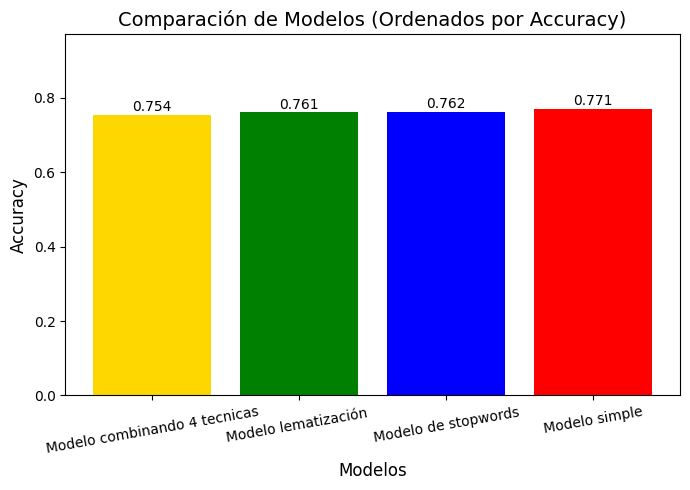

In [ ]:
# Celda 5

# Modelos y Accuracy
modelos = ["Modelo simple", "Modelo de stopwords", "Modelo lematización ", "Modelo combinando 4 tecnicas"]
Accuracy = [accuracy_CountVect, accuracy_stopwords, accuracy_lemma, accuracy_cuatro_m]
colores = ['red', 'blue', 'green', 'gold']

# Redondear decimales
Accuracy = [round(valor, 3) for valor in Accuracy]

# Juntar todo para ordenarlo
datos = list(zip(modelos, Accuracy, colores))

# Ordenar por Accuracy
datos.sort(key=lambda x: x[1])

# Separar de nuevo
modelos, Accuracy, colores = zip(*datos)

# Crear figura
fig, ax = plt.subplots(figsize=(7, 5))
ax.set_title("Comparación de Modelos (Ordenados por Accuracy)", fontsize=14)
ax.bar(modelos, Accuracy, color=colores)

# Función para agregar etiquetas mejor colocadas
def add_labels(ax, x, y):
    for i, v in enumerate(y):
        ax.text(i, v + 0.002, f"{v:.3f}", ha='center', va='bottom', fontsize=10)

add_labels(ax, modelos, Accuracy)

# Etiquetas de los ejes
ax.set_xlabel("Modelos", fontsize=12)
ax.set_ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=10)
plt.ylim(0, max(Accuracy) + 0.2)

plt.tight_layout()
plt.show()

**Analisis**

El mejor rendimiento lo obtuvo el modelo que utiliza únicamente CountVectorizer, sin aplicar eliminación de stopwords ni lematización. A pesar de su simplicidad, este modelo alcanzó un accuracy del 77 %, superando a los modelos que incorporan técnicas adicionales de procesamiento del lenguaje natural.

  Este resultado demuestra que, en algunos casos, un enfoque más simple puede ser más efectivo. Además, el modelo cumple con una necesidad práctica del negocio: automatizar la detección del sentimiento de los clientes a partir de miles de interacciones diarias en Twitter.

  En este caso, el modelo puede convertirse en una herramienta de monitoreo automático para que las aerolíneas detecten a tiempo:

* Tendencias de insatisfacción de los usuarios (por ejemplo, retrasos o mal servicio),

* Opiniones neutrales o informativas que pueden alimentar sistemas de atención,

* Y menciones positivas que podrían aprovecharse para estrategias de marketing o reconocimiento.

El modelo con el rendiemiento mas bajo es el modelo que combina cuatro tecnicas(CountVectorizer, stopwords, lematización y RF) Esto puede deberse a que al aplicar todas estas transformaciones, se reduce en exceso el contenido original de los tweets, eliminando palabras clave que, aunque frecuentes, aportan matices importantes al análisis de sentimiento. Al eliminar demasiadas palabras y modificar otras mediante la lematización, se puede perder parte del contexto y el significado emocional, afectando negativamente la capacidad predictiva del modelo.